# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

In [1]:
! git clone https://github.com/ds4e/wrangling

Cloning into 'wrangling'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 63 (delta 8), reused 5 (delta 5), pack-reused 45 (from 1)
Receiving objects: 100% (63/63), 13.84 MiB | 17.26 MiB/s, done.
Resolving deltas: 100% (14/14), done.


**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [2]:
import numpy as np  # Import the numpy package into your workspace
import matplotlib.pyplot as plt  # Import matplotlib into your workspace
import pandas as pd  # Import the pandas package into your workspace

# Load the CSV file from the correct file path
df = pd.read_csv('/content/wrangling/assignment/data/airbnb_hw.csv', low_memory=False)

# Inspect the first few rows of the dataset to understand its structure
df.head()

# Clean the 'Price' column
# Step 1: Remove dollar signs and commas
df['Price'] = df['Price'].replace({'\$': '', ',': ''}, regex=True)

# Step 2: Convert the 'Price' column to numeric, coercing errors to NaN
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Step 3: Check for missing values in the 'Price' column
missing_values = df['Price'].isna().sum()
print(f'Missing values before cleaning: {missing_values}')

# Step 4: Handle missing values (you can choose to fill or drop them)
# Option 1: Fill missing values with the median price
df['Price'].fillna(df['Price'].median(), inplace=True)

# Final check of the 'Price' column after cleaning
missing_values_after = df['Price'].isna().sum()
print(f'Missing values after cleaning: {missing_values_after}')
df['Price'].head()

Missing values before cleaning: 0
Missing values after cleaning: 0


<ipython-input-2-43a593d248a6>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(df['Price'].median(), inplace=True)


,Price
0,145
1,37
2,28
3,199
4,549


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [42]:
#1
import numpy as np  # Import the numpy package into your workspace
import matplotlib.pyplot as plt  # Import matplotlib into your workspace
import pandas as pd  # Import the pandas package into your workspace


df = pd.read_excel('/content/wrangling/data/GSAF5.xls')

# Inspect the first few rows of the dataset to understand its structure
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Peppino Fappani,M,69,...,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Gianluca Di Gioia,M,48,...,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
#2
list = ['Date', 'Year', 'Type', 'Country', 'State','Location','Activity','Name','Sex','Age', 'Injury','Fatal Y/N','Species','Source']
new_df = df.filter(list) # Keep only the variables on the list
print( new_df.columns, '\n', new_df.shape, '\n')
new_df.head()

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Source'],
      dtype='object') 
 (6990, 13) 



,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Source
0,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,Bitten on the arm,N,Kevin McMurray Trackingsharks.com
1,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,Severe arm injury and delay in medical treatme...,Y,Johannes Marchand Todd Smith
2,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,Body not recovered,Y,Glen Folkard: Simon De Marchi News.com.au: The...
3,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Peppino Fappani,M,69,Injuries to stomach preventing attack on friend,N,Todd Smith : Kevin McMurray Trackingsharks .co...
4,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Gianluca Di Gioia,M,48,Entire calf muscle removed and bitten both arm...,Y,Todd Smith : Kevin McMurray Trackingsharks .co...


In [44]:
#3
var = 'Year' # clean the year variable
new_df['Year'] = pd.to_numeric(new_df['Year'], errors='coerce')
print('Before coercion: \n', new_df[var].describe(),'\n') # The year variable is not read by Pandas as a number

new_df_filtered = new_df[new_df['Year'] >= 1940]
new_df_filtered.head()

#Describing the Range:
#25th Percentile (25%): The year at the 25% mark is 1947, indicating that 25% of the data is before this year.
#50th Percentile (50%): The median year is 1985.5, which suggests that half of the attacks occurred before this year.
#75th Percentile (75%): The year at the 75% mark is 2009, meaning that 75% of the data falls before this year.

Before coercion: 
 count    6988.000000
mean     1934.992845
std       272.117473
min         0.000000
25%      1947.000000
50%      1985.500000
75%      2009.000000
max      2026.000000
Name: Year, dtype: float64 



,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Source
0,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,Bitten on the arm,N,Kevin McMurray Trackingsharks.com
1,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,Severe arm injury and delay in medical treatme...,Y,Johannes Marchand Todd Smith
2,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,Body not recovered,Y,Glen Folkard: Simon De Marchi News.com.au: The...
3,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Peppino Fappani,M,69,Injuries to stomach preventing attack on friend,N,Todd Smith : Kevin McMurray Trackingsharks .co...
4,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Gianluca Di Gioia,M,48,Entire calf muscle removed and bitten both arm...,Y,Todd Smith : Kevin McMurray Trackingsharks .co...


After coercion: 
 count    5456.000000
mean     1991.925037
std        24.079803
min      1940.000000
25%      1969.000000
50%      2000.000000
75%      2013.000000
max      2026.000000
Name: Year, dtype: float64 



<Axes: >

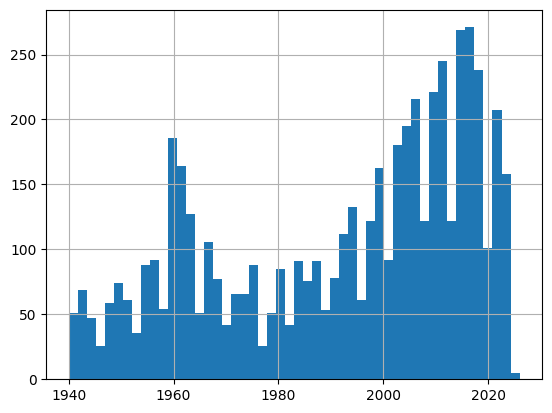

In [45]:
var = 'Year' # We'll clean the year variable
print('After coercion: \n', new_df_filtered[var].describe(),'\n') # The year variable is not read by Pandas as a number
new_df_filtered[var].hist(bins=50) # Initial histogram; check out the x axis

#The attacks appear to be increasing over time since 1940.

Before coercion: 
 count     3678
unique     233
top         16
freq        80
Name: Age, dtype: int64 

After coercion: 
 count    3557.000000
mean       28.542311
std        14.719221
min         1.000000
25%        17.000000
50%        25.000000
75%        37.000000
max        87.000000
Name: Age, dtype: float64 

Total Missings: 
 1899 



<ipython-input-46-9bbe4a84555a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_filtered['Age'] = pd.to_numeric(new_df_filtered['Age'], errors='coerce') # Coerce the variable to numeric
<ipython-input-46-9bbe4a84555a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_filtered['Age_nan'] = new_df_filtered['Age'].isnull() # Equals 1 if missing, 0 if non-null


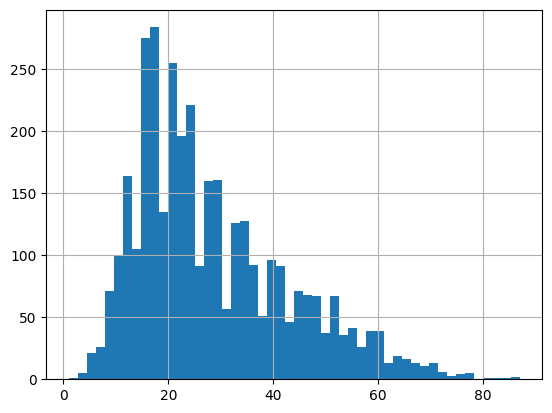

In [46]:
#clean the age variable and make a histogram:
var = 'Age' # We'll clean the age variable
print('Before coercion: \n', new_df_filtered[var].describe(),'\n') # The age variable is not read by Pandas as a number

## An example of type coercion:

# How to coerce a variable to numeric:
new_df_filtered['Age'] = pd.to_numeric(new_df_filtered['Age'], errors='coerce') # Coerce the variable to numeric

# Create a missing dummy:
new_df_filtered['Age_nan'] = new_df_filtered['Age'].isnull() # Equals 1 if missing, 0 if non-null

# After coercion:
print('After coercion: \n', new_df_filtered['Age'].describe(),'\n') # Describe the numeric variable
new_df_filtered['Age'].hist(bins = 50) # Histogram of the variable values
print('Total Missings: \n', sum(new_df_filtered['Age_nan']),'\n') # How many missing values are there?

In [47]:
new_df_filtered['Sex'] = new_df_filtered['Sex'].str.upper()  # Ensure all are uppercase

# Now, calculate the proportion of male victims
male_count = new_df_filtered[new_df_filtered['Sex'] == 'M'].shape[0]
total_count = new_df_filtered.shape[0]

# Proportion of male victims
male_proportion = male_count / total_count

# Print the results
print(f"Proportion of victims who are male: {male_proportion:.2f}")

Proportion of victims who are male: 0.79


<ipython-input-47-3e8578686e5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_filtered['Sex'] = new_df_filtered['Sex'].str.upper()  # Ensure all are uppercase


In [ ]:
#Approx 79% of the victims are male

In [48]:
new_df_filtered['Type'] = new_df_filtered['Type'].str.lower()  # Convert to lowercase

# Map non-standard or misspelled values to 'Provoked', 'Unprovoked', or 'Unknown'
new_df_filtered['Type'] = new_df_filtered['Type'].replace({
    'provoked': 'Provoked',
    'unprovoked': 'Unprovoked',
    'unknown': 'Unknown',
    # Add any other common variations you may encounter (e.g., abbreviations or errors)
})

# Count the number of unprovoked attacks
unprovoked_count = new_df_filtered[new_df_filtered['Type'] == 'Unprovoked'].shape[0]
total_count = new_df_filtered.shape[0]

# Proportion of unprovoked attacks
unprovoked_proportion = unprovoked_count / total_count

# Print the result
print(f"Proportion of unprovoked attacks: {unprovoked_proportion:.2f}")

Proportion of unprovoked attacks: 0.74


<ipython-input-48-8b3c1609cec9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_filtered['Type'] = new_df_filtered['Type'].str.lower()  # Convert to lowercase
<ipython-input-48-8b3c1609cec9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_filtered['Type'] = new_df_filtered['Type'].replace({


In [ ]:
#74% of the attacks are unprovoked

In [49]:
new_df_filtered['Fatal Y/N'] = new_df_filtered['Fatal Y/N'].str.strip().str.upper()  # Remove extra spaces and convert to uppercase

# Map non-standard or misspelled values to 'Y', 'N', or 'Unknown'
new_df_filtered['Fatal Y/N'] = new_df_filtered['Fatal Y/N'].replace({
    'yes': 'Y',
    'no': 'N',
    'y': 'Y',
    'n': 'N',
    'unknown': 'Unknown',
    'uncertain': 'Unknown',  # Adding any possible variations
    'not recorded': 'Unknown',
    # Add any other variations that might appear
})

# Check the unique values to confirm the cleaning process
print("Unique values in 'Fatal Y/N' after cleaning:", new_df_filtered['Fatal Y/N'].unique())

Unique values in 'Fatal Y/N' after cleaning: ['N' 'Y' 'F' 'M' nan 'NQ' 'UNKNOWN' 'Y X 2']


<ipython-input-49-498d01312948>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_filtered['Fatal Y/N'] = new_df_filtered['Fatal Y/N'].str.strip().str.upper()  # Remove extra spaces and convert to uppercase
<ipython-input-49-498d01312948>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_filtered['Fatal Y/N'] = new_df_filtered['Fatal Y/N'].replace({


In [52]:
total_men = new_df_filtered[new_df_filtered['Sex'] == 'M'].shape[0]
total_women = new_df_filtered[new_df_filtered['Sex'] == 'F'].shape[0]

# Calculate the proportion of unprovoked attacks for each gender
unprovoked_men_proportion = attack_by_gender['M'] / total_men
unprovoked_women_proportion = attack_by_gender['F'] / total_women

# Display the proportions
print(f"Proportion of unprovoked attacks on men: {unprovoked_men_proportion:.4f}")
print(f"Proportion of unprovoked attacks on women: {unprovoked_women_proportion:.4f}")

Proportion of unprovoked attacks on men: 0.1034
Proportion of unprovoked attacks on women: 0.0397


In [ ]:
#Sharks are more likley to launch unprovoked attacks on men

In [60]:
#Provoked attacks are less likley to be fatal

Series([], Name: Fatal, dtype: float64)


In [65]:
# Ensure that 'Sex' column contains only valid entries (M for Male, F for Female)
# Standardize the 'Sex' column to uppercase and strip any leading/trailing spaces
new_df_filtered['Sex'] = new_df_filtered['Sex'].str.upper().str.strip()

# Check for any missing or invalid values in the 'Sex' column
print("Unique values in 'Sex':", new_df_filtered['Sex'].unique())


# Group by 'Sex' (Male, Female) and calculate the proportion of fatal attacks
fatality_by_gender = new_df_filtered.groupby('Sex')['Fatal Y/N'].mean()

# Display the fatality proportions for male and female victims
print(fatality_by_gender)

Unique values in 'Sex': ['M' 'F' nan 'LLI' 'M X 2']


<ipython-input-65-e5cf458b2a49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_filtered['Sex'] = new_df_filtered['Sex'].str.upper().str.strip()


TypeError: agg function failed [how->mean,dtype->object]

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. The paper is about why its so important to clean data in order to prepare it for analysis. The paper specifically focuses on the concept of data tidying, where you can manipulate, model, and visualize data much easier--
this is because each variable is a column, each observation is a row, and each type of observational unit is a table.

2. The "tidy data standard" is intended "to facilitate initial exploration and analysis of the data, and to simplify the development of data analysis
tools that work well together."

3. I interpreted the first quote as a way of saying tidy datasets follow a consistent, standardized structure, whereas messy datasets can have many different, irregular formats that make them difficult to work with and work together, like messy families. As for the second quote, I think this is referring to the fact that although it can be easy to identify observations and variables in a specific dataset, creating a precise definition for them universally is much harder because the structure of data varies a lot depending on the context and that specific data set.

4. The reading explains that values are "usually either numbers (if quantitative) or strings (if
qualitative)." They are "organised in two ways. Every value belongs to a variable and an observation. A variable contains all values that measure the same underlying attribute (like
height, temperature, duration) across units. An observation contains all values measured on the same unit (like a person, or a day, or a race) across attributes."

5. Tidy data in section 2.3:
   1. Each variable forms a column.
   2. Each observation forms a row.
   3. Each type of observational unit forms a table.

6. The five most common problems:
   1. Column headers are values, not variable names.
   2. Multiple variables are stored in one column.
   3. Variables are stored in both rows and columns.
   4. Multiple types of observational units are stored in the same table.
   5. A single observational unit is stored in multiple tables
Table 4 is messy because each column does not represent a variable and each row does not represent an observation. In order to fix this, one would have to "melt" the dataset. "Melting" the dataset means that you have to turn some of the columns into rows. Or "stack" them -- make the table longer and thinner in order to tidy it and make it easier to work with.

7. Table 11 is messy because there are missing values and variables are stored in both rows and columns. Table 12 is tidy and "molten" because each column represents a variable and each row  represents an observation -- Each row represents the meteorological measurements for a single day and there are two measured variables, minimum (tmin) and maximum (tmax) temperature; all other variables are fixed.

8. If tidy data is only useful when paired with tools designed for it, then tidy tools and tidy data are basically inextricably linked. This creates a situation where changing either the data structure or the tools alone won't necessarily improve workflow (you get stuck in a local maxima). Wickham hopes that future work on data wrangling will improve tools for tidying data, make data cleaning easier, and use insights from user-centered design to better support how people work with data. He also wants tools that can handle different data formats and optimize performance.

Acknowledgements: I used ChatGPT to help me with some of the questions in this assignment, mainly the last couple of Q2